In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#df = pd.read_csv('../../data/anemia_synth_dataset_some_nans_unspecified_more_feats.csv')
#df = pd.read_csv('../../data/more_features/more_feats_new_labels_0.1.csv')
#df = pd.read_csv('../../data/more_features/with_correlated_feature_0.1.csv')
df = pd.read_csv('../../final/data/data_correlated_feats.csv')
df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
0,11.875670,161.104070,3.981397,NaN,358.191297,77.370085,NaN,4.604753,0,0.508604,86.888802,NaN,NaN,NaN,NaN,35.627010,NaN,Anemia of chronic disease
1,9.296779,457.149834,1.874231,5.544915,NaN,78.717345,NaN,3.543099,0,0.784442,37.659905,NaN,NaN,NaN,NaN,27.890337,NaN,Anemia of chronic disease
2,9.780377,483.216550,4.041312,5.515052,304.155693,100.750651,118.428782,2.912252,1,1.129411,140.917968,47.714319,62.722981,20.039071,46.973234,29.341132,38.936895,Vitamin B12/Folate deficiency anemia
3,9.131688,57.578776,5.778568,1.976049,207.684776,96.855220,NaN,2.828455,0,1.569724,26.393979,NaN,NaN,NaN,NaN,27.395064,NaN,Hemolytic anemia
4,11.395680,NaN,NaN,1.320481,318.250045,102.206351,NaN,3.344904,0,NaN,NaN,NaN,NaN,NaN,NaN,34.187041,NaN,Vitamin B12/Folate deficiency anemia


In [5]:
df.isna().sum()

hemoglobin                   0
ferritin                 28600
ret_count                19600
segmented_neutrophils    17800
tibc                     27525
mcv                       5000
serum_iron               38500
rbc                       5000
gender                       0
creatinine               19600
cholestrol               19600
copper                   44800
ethanol                  38500
folate                   44800
glucose                  38500
hematocrit                   0
tsat                     50953
label                        0
dtype: int64

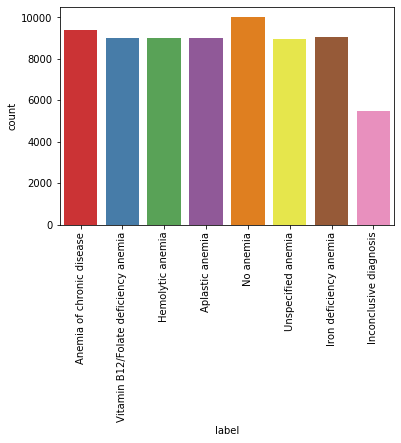

In [6]:
plt.xticks(rotation=90)
sns.countplot(x='label', data=df, palette = 'Set1')

In [7]:
def plot_feature_frequencies(df):
    output_df  = pd.DataFrame()
    for col in df.columns:
        if col != 'label':
            missing_num = df.isna().sum()[col]
            present_num = df.notna().sum()[col]
            col_dict = {'feature name':col, 'present': present_num, 'missing':missing_num,}
            output_df = output_df.append(col_dict, ignore_index=True)
    output_df = output_df[['feature name', 'present', 'missing']]
    output_df.plot(x='feature name', kind='bar', figsize=(8,6), stacked=True)
    return output_df

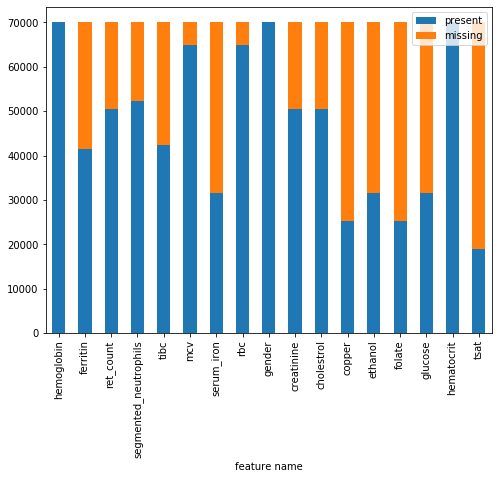

In [8]:
output_df = plot_feature_frequencies(df)

In [9]:
len(df)

70000

#### Correlation matrix

In [10]:
corr_cols = [col for col in df.columns if col not in ['gender', 'label']]
corr_df = df[corr_cols]
corr_df.corr()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat
hemoglobin,1.000000,0.058758,0.021591,0.062429,-0.059385,0.001336,0.005415,0.893373,0.006385,-0.010064,-0.001297,0.008188,-0.007030,0.013621,1.000000,0.032989
ferritin,0.058758,1.000000,-0.003590,-0.066559,-0.210159,0.249728,-0.005099,-0.054549,0.000050,0.007023,-0.010760,0.000731,-0.016178,0.004134,0.058758,0.103198
ret_count,0.021591,-0.003590,1.000000,-0.031355,0.005573,0.003651,0.000080,0.015903,0.006799,0.001436,-0.011424,-0.005943,0.008616,0.007279,0.021591,-0.001213
segmented_neutrophils,0.062429,-0.066559,-0.031355,1.000000,0.053927,-0.299638,-0.003237,0.161673,0.006302,-0.000558,-0.014742,0.002230,-0.002500,-0.001521,0.062429,-0.024200
tibc,-0.059385,-0.210159,0.005573,0.053927,1.000000,-0.239861,-0.009446,0.063820,-0.001498,-0.007750,0.001492,-0.006597,0.016993,-0.002203,-0.059385,-0.634627
mcv,0.001336,0.249728,0.003651,-0.299638,-0.239861,1.000000,0.002294,-0.435182,-0.000819,0.004356,0.007289,-0.002948,0.000189,-0.006274,0.001336,0.113362
serum_iron,0.005415,-0.005099,0.000080,-0.003237,-0.009446,0.002294,1.000000,0.005046,-0.003150,-0.000629,-0.017775,-0.006112,0.017181,-0.010219,0.005415,0.644148
rbc,0.893373,-0.054549,0.015903,0.161673,0.063820,-0.435182,0.005046,1.000000,-0.000630,-0.008095,-0.001497,0.004531,-0.008375,0.011379,0.893373,-0.023658
creatinine,0.006385,0.000050,0.006799,0.006302,-0.001498,-0.000819,-0.003150,-0.000630,1.000000,-0.006172,0.002984,0.005468,0.005352,-0.001480,0.006385,0.009568
cholestrol,-0.010064,0.007023,0.001436,-0.000558,-0.007750,0.004356,-0.000629,-0.008095,-0.006172,1.000000,-0.005397,0.001113,0.002104,-0.016446,-0.010064,0.011587


In [11]:
def heat_map(df):
    plt.figure(figsize=(9,7))
    plt.title('Correlation Matrix')
    sns.heatmap(df, cmap='OrRd', linewidth=1)
    plt.show()

In [12]:
df.columns

Index(['hemoglobin', 'ferritin', 'ret_count', 'segmented_neutrophils', 'tibc',
       'mcv', 'serum_iron', 'rbc', 'gender', 'creatinine', 'cholestrol',
       'copper', 'ethanol', 'folate', 'glucose', 'hematocrit', 'tsat',
       'label'],
      dtype='object')

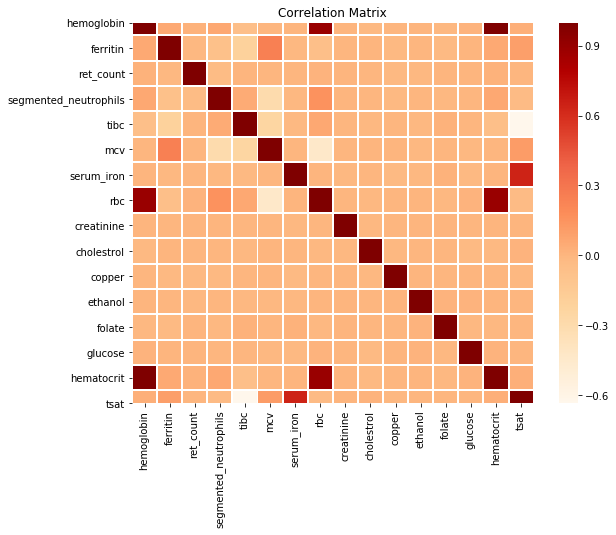

In [13]:
heat_map(corr_df.corr())